# Relationship isotropic susceptibility $\chi$ and self-demagnetization

This code shows the relationship between the isotropic susceptibility $\chi$ and the self-demagnetization for triaxial ellipsoids as a function of the ratio $\frac{a - b}{b - c}$.

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import get_cmap
from fatiando import mesher, utils
from fatiando.gravmag import triaxial_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

In [3]:
Nb = 30
Nk = 50
c0 = 3000.

### Isostropic susceptibility $\chi$ (in SI)

In [4]:
k = np.linspace(0.001, 1., Nk)

### Triaxial ellipsoids (model 1)

In [5]:
a1 = 2.*c0

In [6]:
b1 = c0 + (a1 - c0)*np.linspace(0.01, 0.99, Nb)
theta_1 = []

In [7]:
for bi in b1:
    
    # demagnetizing factors
    n11, n22, n33 = triaxial_ellipsoid.demag_factors(a1, bi, c0)
    
    theta_1.append((1./(1. - k*n11) - 1.)**2 + (1./(1. - k*n22) - 1.)**2 + (1./(1. - k*n33) - 1.)**2)

### Triaxial ellipsoids (model 2)

In [8]:
a2 = 3.*c0

In [9]:
b2 = c0 + (a2 - c0)*np.linspace(0.01, 0.99, Nb)
theta_2 = []

In [10]:
for bi in b2:
    
    # demagnetizing factors
    n11, n22, n33 = triaxial_ellipsoid.demag_factors(a2, bi, c0)
    
    theta_2.append((1./(1. - k*n11) - 1.)**2 + (1./(1. - k*n22) - 1.)**2 + (1./(1. - k*n33) - 1.)**2)

### Triaxial ellipsoids (model 3)

In [11]:
a3 = 4.*c0

In [12]:
b3 = c0 + (a3 - c0)*np.linspace(0.01, 0.99, Nb)
theta_3 = []

In [13]:
for bi in b3:
    
    # demagnetizing factors
    n11, n22, n33 = triaxial_ellipsoid.demag_factors(a3, bi, c0)
    
    theta_3.append((1./(1. - k*n11) - 1.)**2 + (1./(1. - k*n22) - 1.)**2 + (1./(1. - k*n33) - 1.)**2)

### Plot the results

In [14]:
b_norm = np.linspace(0., 1., Nb)

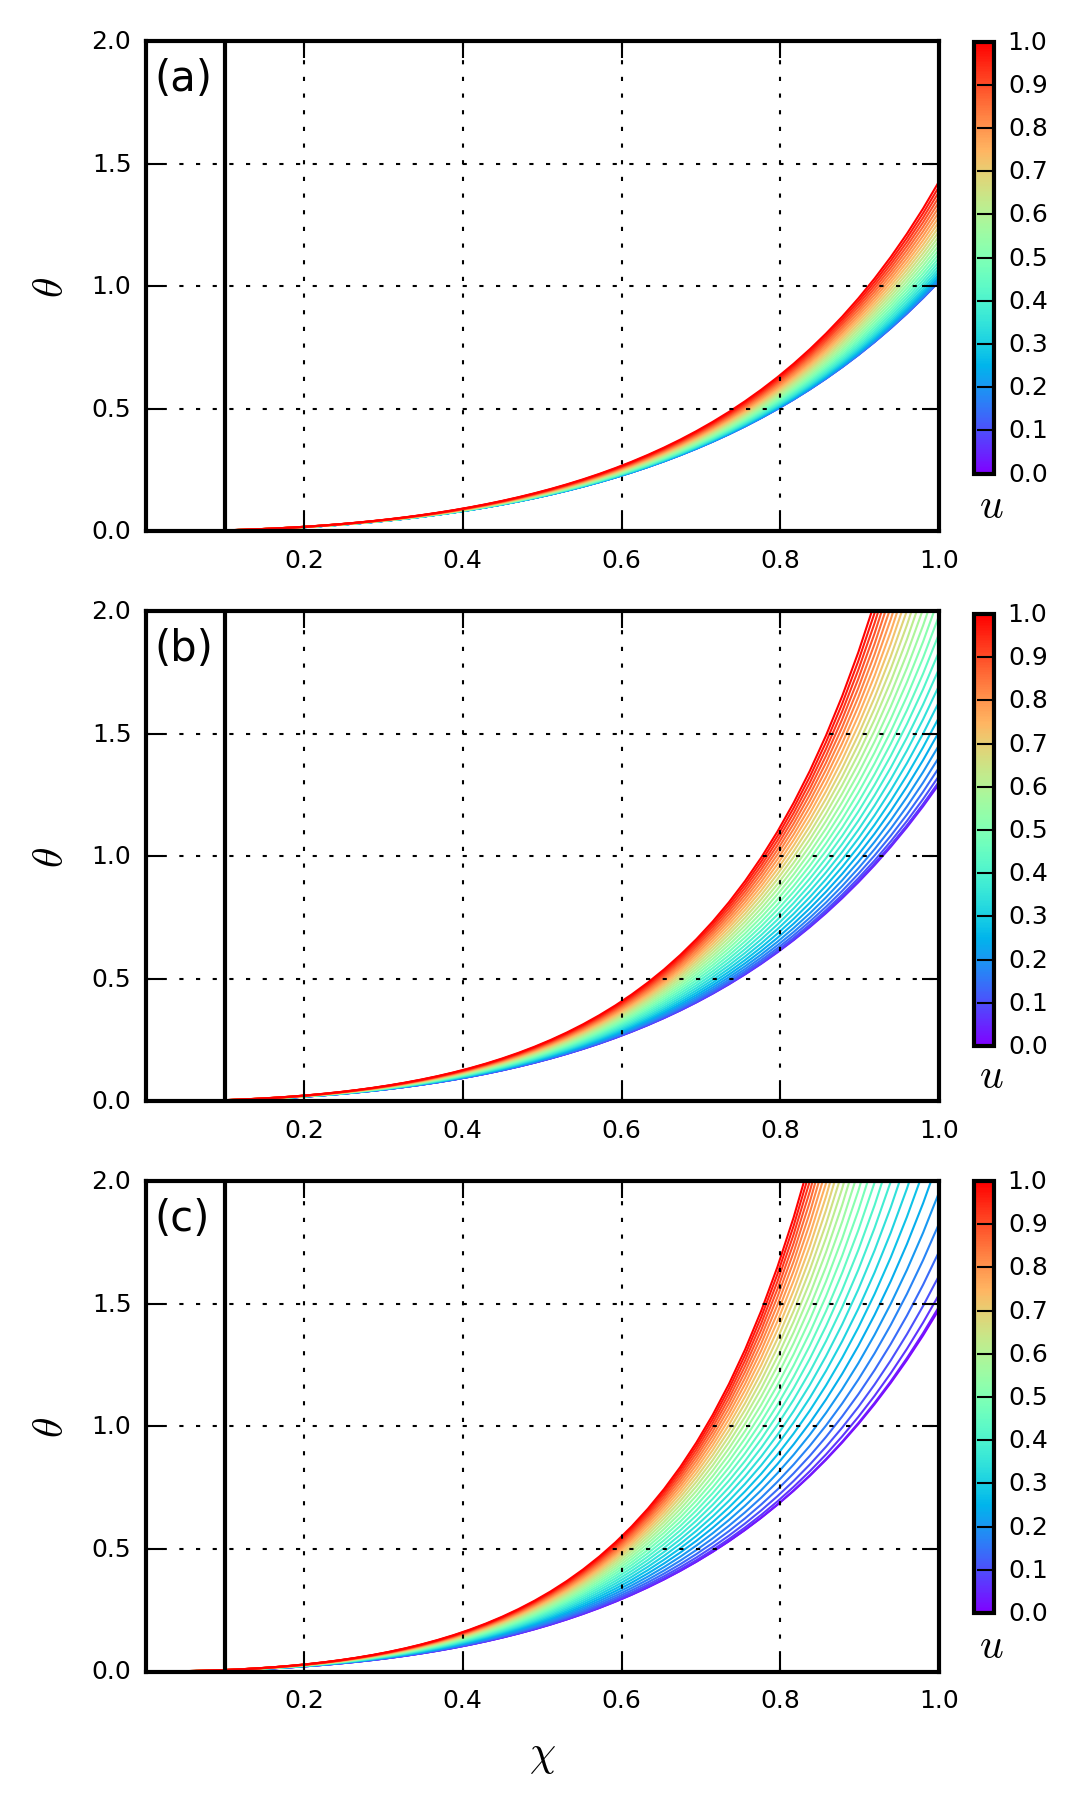

In [19]:
fig = plt.figure(figsize=(3.27, 6))

label_fontsize = 10
cb_x0 = 0.99
cb_width = 0.02
cb_aspect = 0.24
cb_space = 0.02

# Set the line colors
colors = get_cmap('rainbow')

plt.subplot(3, 1, 1)

for t, b in zip(theta_1, b_norm):
    plt.plot(k, t, '-k', linewidth=0.5, color=colors(b))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
#plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 2.)
plt.grid()
plt.annotate(s='(a)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.annotate('$u$', xy = (1.05, 0.03), xycoords = 'axes fraction',
             fontsize=10)

norm = Normalize(vmin = 0, vmax = 1)
ax = fig.add_axes([cb_x0, 0.218 + 2*(cb_aspect + cb_space), cb_width, cb_aspect], adjustable='box-forced')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.subplot(3, 1, 2)

for t, b in zip(theta_2, b_norm):
    plt.plot(k, t, '-k', linewidth=0.5, color=colors(b))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
#plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 2.)
plt.grid()
plt.annotate(s='(b)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.annotate('$u$', xy = (1.05, 0.03), xycoords = 'axes fraction',
             fontsize=10)

norm = Normalize(vmin = 0, vmax = 1)
ax = fig.add_axes([cb_x0, 0.16 + (cb_aspect + cb_space), cb_width, cb_aspect], adjustable='box-forced')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.subplot(3, 1, 3)

for t, b in zip(theta_3, b_norm):
    plt.plot(k, t, '-k', linewidth=0.5, color=colors(b))
plt.plot([0.1, 0.1], [0., 10.], '-k')
plt.ylabel('$\\theta$', fontsize=10)
plt.xlabel('$\chi$', fontsize=10)
plt.xlim(k.min(), k.max())
plt.ylim(0., 2.)
plt.grid()
plt.annotate(s='(c)', xy=(0.015,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.annotate('$u$', xy = (1.05, 0.03), xycoords = 'axes fraction',
             fontsize=10)

norm = Normalize(vmin = 0, vmax = 1)
ax = fig.add_axes([cb_x0, 0.105, cb_width, cb_aspect], adjustable='box-forced')
cb = ColorbarBase(ax, cmap=colors, norm=norm, orientation = 'vertical')

plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\chi_triaxial.pdf', facecolor='w', bbox_inches='tight')
plt.show()